In [57]:
import pandas as pd
import mplfinance as mpl
import talib as ta
import yfinance as yf
from sklearn.model_selection import train_test_split

In [51]:
df= yf.download('ETH-USD', start='2018-11-07', end='2023-11-07')
df.head(10)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-11-07,218.899002,221.651993,216.796005,217.182999,217.182999,1927830000
2018-11-08,217.326996,218.337997,212.199005,212.231003,212.231003,1769080000
2018-11-09,211.987000,213.315994,209.514999,210.074005,210.074005,1554750000
2018-11-10,209.975006,213.856995,209.804993,212.533005,212.533005,1377760000
2018-11-11,212.479004,212.998993,208.867996,211.339996,211.339996,1501600000
2018-11-12,211.513000,212.623001,208.923996,210.417999,210.417999,1452380000
2018-11-13,210.149002,210.514999,206.134995,206.826004,206.826004,1610260000
2018-11-14,206.533997,207.044998,174.084000,181.397003,181.397003,2595330000
2018-11-15,181.899002,184.251007,170.188995,180.806000,180.806000,2638410000


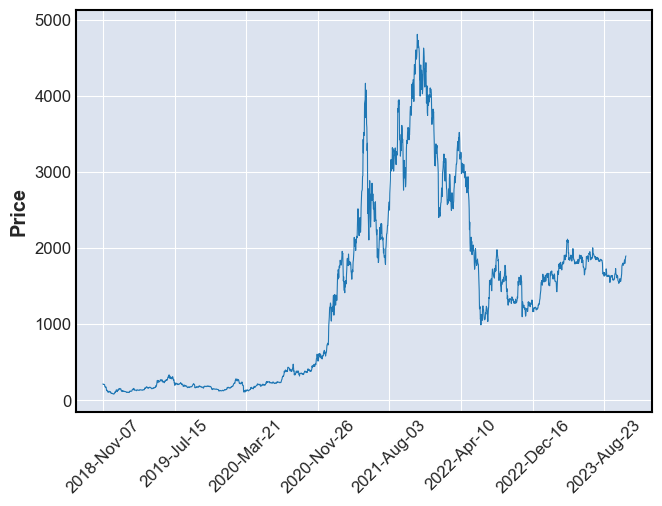

In [81]:
mpl.plot(df, type='line')

In [52]:
# have a look at everything that the directory of Technical Analysis Library has to offer 
dir(ta)

['ACOS',
 'AD',
 'ADD',
 'ADOSC',
 'ADX',
 'ADXR',
 'APO',
 'AROON',
 'AROONOSC',
 'ASIN',
 'ATAN',
 'ATR',
 'AVGPRICE',
 'BBANDS',
 'BETA',
 'BOP',
 'CCI',
 'CDL2CROWS',
 'CDL3BLACKCROWS',
 'CDL3INSIDE',
 'CDL3LINESTRIKE',
 'CDL3OUTSIDE',
 'CDL3STARSINSOUTH',
 'CDL3WHITESOLDIERS',
 'CDLABANDONEDBABY',
 'CDLADVANCEBLOCK',
 'CDLBELTHOLD',
 'CDLBREAKAWAY',
 'CDLCLOSINGMARUBOZU',
 'CDLCONCEALBABYSWALL',
 'CDLCOUNTERATTACK',
 'CDLDARKCLOUDCOVER',
 'CDLDOJI',
 'CDLDOJISTAR',
 'CDLDRAGONFLYDOJI',
 'CDLENGULFING',
 'CDLEVENINGDOJISTAR',
 'CDLEVENINGSTAR',
 'CDLGAPSIDESIDEWHITE',
 'CDLGRAVESTONEDOJI',
 'CDLHAMMER',
 'CDLHANGINGMAN',
 'CDLHARAMI',
 'CDLHARAMICROSS',
 'CDLHIGHWAVE',
 'CDLHIKKAKE',
 'CDLHIKKAKEMOD',
 'CDLHOMINGPIGEON',
 'CDLIDENTICAL3CROWS',
 'CDLINNECK',
 'CDLINVERTEDHAMMER',
 'CDLKICKING',
 'CDLKICKINGBYLENGTH',
 'CDLLADDERBOTTOM',
 'CDLLONGLEGGEDDOJI',
 'CDLLONGLINE',
 'CDLMARUBOZU',
 'CDLMATCHINGLOW',
 'CDLMATHOLD',
 'CDLMORNINGDOJISTAR',
 'CDLMORNINGSTAR',
 'CDLONNECK',
 'CD

In [53]:
# Creating a dataframe containing all the patterns identified in the historic OHLC data
Open=df.Open
High=df.High
Low=df.Low
Close=df.Close

results = []
cols = []

for attr in dir(ta):
    if attr[:3]=='CDL':
        res = getattr(ta, attr)(Open, High, Low, Close)
        results.append(res)
        cols.append(attr)
        
patterns = pd.DataFrame(results).T
patterns.columns = cols
patterns.head(10)


,CDL2CROWS,CDL3BLACKCROWS,CDL3INSIDE,CDL3LINESTRIKE,CDL3OUTSIDE,CDL3STARSINSOUTH,CDL3WHITESOLDIERS,CDLABANDONEDBABY,CDLADVANCEBLOCK,CDLBELTHOLD,...,CDLSPINNINGTOP,CDLSTALLEDPATTERN,CDLSTICKSANDWICH,CDLTAKURI,CDLTASUKIGAP,CDLTHRUSTING,CDLTRISTAR,CDLUNIQUE3RIVER,CDLUPSIDEGAP2CROWS,CDLXSIDEGAP3METHODS
Date,,,,,,,,,,,,,,,,,,,,,
2018-11-07,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-11-08,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-11-09,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-11-10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-11-11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-11-12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-11-13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-11-14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-11-15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
# Combining the patterns dataframe and the actual historic OHLC dataframe
combined_df = pd.concat([df, patterns], axis=1)
combined_df.head(10)

,Open,High,Low,Close,Adj Close,Volume,CDL2CROWS,CDL3BLACKCROWS,CDL3INSIDE,CDL3LINESTRIKE,...,CDLSPINNINGTOP,CDLSTALLEDPATTERN,CDLSTICKSANDWICH,CDLTAKURI,CDLTASUKIGAP,CDLTHRUSTING,CDLTRISTAR,CDLUNIQUE3RIVER,CDLUPSIDEGAP2CROWS,CDLXSIDEGAP3METHODS
Date,,,,,,,,,,,,,,,,,,,,,
2018-11-07,218.899002,221.651993,216.796005,217.182999,217.182999,1927830000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-11-08,217.326996,218.337997,212.199005,212.231003,212.231003,1769080000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-11-09,211.987000,213.315994,209.514999,210.074005,210.074005,1554750000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-11-10,209.975006,213.856995,209.804993,212.533005,212.533005,1377760000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-11-11,212.479004,212.998993,208.867996,211.339996,211.339996,1501600000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-11-12,211.513000,212.623001,208.923996,210.417999,210.417999,1452380000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-11-13,210.149002,210.514999,206.134995,206.826004,206.826004,1610260000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-11-14,206.533997,207.044998,174.084000,181.397003,181.397003,2595330000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-11-15,181.899002,184.251007,170.188995,180.806000,180.806000,2638410000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
# Splitting the data into training data and testing data to predict and check the accuracy of model before using it on realtime data

y= combined_df[['Close']]
X= combined_df.drop(['Close'], axis=1, inplace=False)
X= X.drop(['Adj Close'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.9, test_size=0.1, shuffle=False)
